In [2]:
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
# url = 'https://drive.google.com/uc?id={}'.format("1EpS1_XS3DkcLl-RG18Ooon4Vetyymdq_")
# df = pd.read_csv(url)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('..\diabetes.csv')

In [ ]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
selected_feature = ['Glucose','BMI']
x_db= x[selected_feature]
# x_db = x
print(x_db)

     Glucose   BMI
0        148  33.6
1         85  26.6
2        183  23.3
3         89  28.1
4        137  43.1
..       ...   ...
763      101  32.9
764      122  36.8
765      121  26.2
766      126  30.1
767       93  30.4

[768 rows x 2 columns]


In [ ]:
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data

In [ ]:
x_db = x_db.to_numpy()
y = y.to_numpy()

In [ ]:
x_db_n = normalize_data(x_db)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_db_n, y, test_size=0.20, random_state=0)

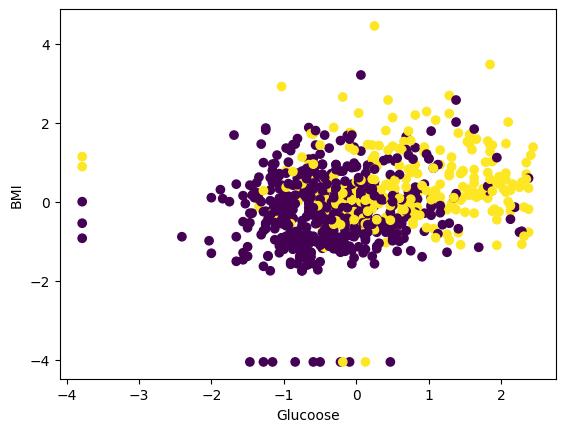

In [ ]:
plt.scatter(x_db_n[:,0],x_db_n[:,1],c=y)
plt.xlabel('Glucoose')
plt.ylabel('BMI')
plt.show()

In [ ]:
class KohonenSOM:
    def __init__(self, input_size, map_size):
        self.weights = np.random.rand(map_size[0], map_size[1], input_size)
        self.map_size = map_size

    def euclidean_distance(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2))

    def update_weights(self, input_vector, winner, learning_rate, neighborhood_radius):
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                distance = self.euclidean_distance(np.array([i, j]), winner)
                if distance <= neighborhood_radius:
                    self.weights[i, j, :] += learning_rate * (input_vector - self.weights[i, j, :])

    def train(self, data, epochs, initial_learning_rate, initial_radius):
        for epoch in range(epochs):
            for input_vector in data:
                # Find the winner neuron (best matching unit)
                winner = np.unravel_index(np.argmin(np.sum((self.weights - input_vector) ** 2, axis=2)), self.map_size)

                # Update weights based on the winner
                learning_rate = initial_learning_rate * np.exp(-epoch / epochs)
                neighborhood_radius = initial_radius * np.exp(-epoch / epochs)
                self.update_weights(input_vector, winner, learning_rate, neighborhood_radius)

    #quantization error
    def quantization_error(self, data):
      total_error = 0
      for input_vector in data:
          winner = np.unravel_index(np.argmin(np.sum((self.weights - input_vector) ** 2, axis=2)), self.map_size)
          total_error += self.euclidean_distance(input_vector, self.weights[winner])
      return total_error / len(data)

    #Normalizing Quantization Error
    def normalized_quantization_error(self, data):
      max_possible_error = np.sqrt(np.sum((np.max(self.weights) - np.min(self.weights)) ** 2))  # Maximum possible Euclidean distance in the weight space
      total_error = 0
      for input_vector in data:
         winner = np.unravel_index(np.argmin(np.sum((self.weights - input_vector) ** 2, axis=2)), self.map_size)
         total_error += self.euclidean_distance(input_vector, self.weights[winner])

      normalized_error = total_error / (len(data) * max_possible_error)
      return normalized_error

    def visualize(self, data,y):
        plt.figure()
        plt.scatter(data[:, 0], data[:, 1], c=y, label='Input Data')

        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                plt.scatter(self.weights[i, j, 0], self.weights[i, j, 1], c='red', marker='x', s=300)

        plt.title('Kohonen SOM')
        plt.legend()
        plt.show()




In [ ]:
# # Example usage:
# if __name__ == "__main__":
  # Generate some sample 2D data
  # np.random.seed(42)
data = x_train

  # Initialize and train the Kohonen SOM
som = KohonenSOM(input_size=2, map_size=(2, 1))
som.train(data, epochs=200, initial_learning_rate=0.001, initial_radius=1.0)



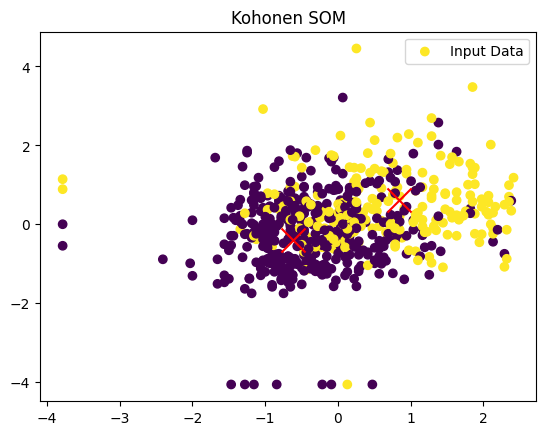

In [ ]:
# Visualize the results
som.visualize(data,y_train)

In [ ]:
som.quantization_error(x_test)

0.9693367405662335

In [ ]:
som.normalized_quantization_error(x_test)

0.6673951922082384

now Doing For Whole dataset

In [ ]:
x_w = x.to_numpy()

In [ ]:
x_w_n = normalize_data(x_w)

In [ ]:
x_tr, x_tst, y_tr, y_tst = train_test_split(
    x_w_n, y, test_size=0.20, random_state=0)

In [ ]:
x_tr.shape

(614, 8)

In [ ]:
data = x_tr

  # Initialize and train the Kohonen SOM
som1 = KohonenSOM(input_size=8, map_size=(5, 2))
som1.train(data, epochs=200, initial_learning_rate=0.001, initial_radius=1.0)

In [ ]:
som1.quantization_error(x_tst)

1.844496695277517

In [ ]:
som1.normalized_quantization_error(x_tst)

0.45644568434543054